In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

import random

# import clear_output
import os
import seaborn as sns

In [4]:
stock_returns = pd.read_csv("../Data/StockReturns.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

In [5]:
new_df =  pd.DataFrame(columns=stock_cols)

In [ ]:
mean_list = []
std_list = []
for col in stock_cols:
    mean_list.append(stock_returns[col].mean())
    std_list.append(stock_returns[col].std())

new_df =  pd.DataFrame(columns=stock_cols)
new_dft = new_df.T
new_dft["Mean"] = mean_list
new_dft["Std"] = std_list
new_dft["ESG"] = esg_scores

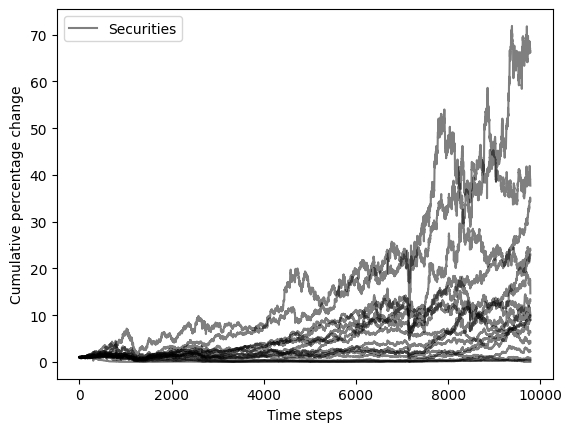

In [4]:
fig, ax = plt.subplots()
for col in stock_cols:
    ax.plot(np.cumprod(stock_returns[col]+1), color="black", alpha=0.5)
ax.set_xlabel("Time steps")
ax.set_ylabel("Cumulative percentage change")
ax.legend(["Securities"])
plt.show()

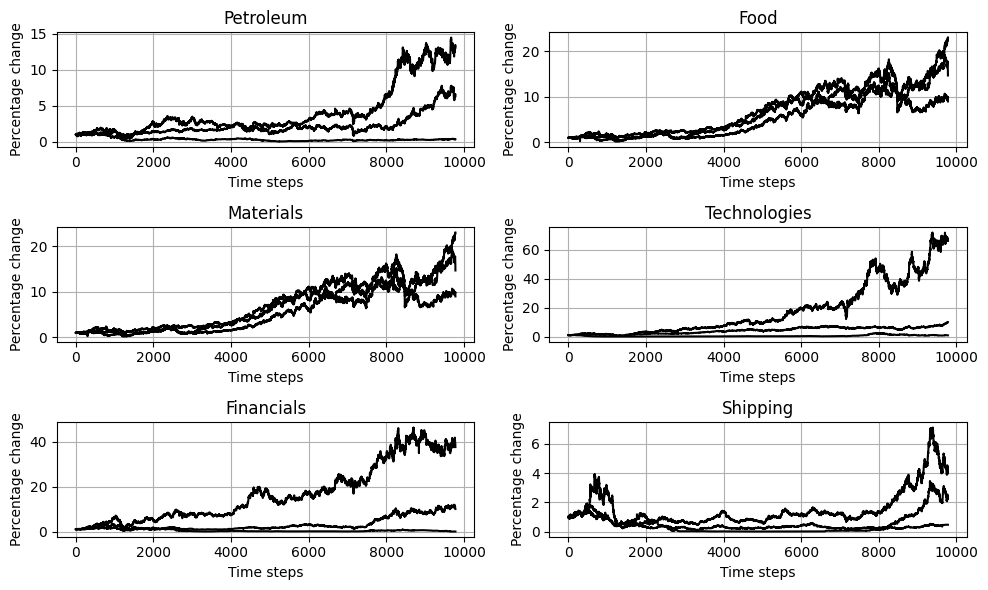

In [ ]:
sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]

fig, ax = plt.subplots(3,2, figsize=(10,6))

for i in range(0,3,1):
    ax[i,0].plot(np.cumprod(stock_returns.iloc[:, i*3:(i+1)*3]+1), color="black", alpha=1)
    ax[i,1].plot(np.cumprod(stock_returns.iloc[:, 3+i*6 : (i+1)*6]+1), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


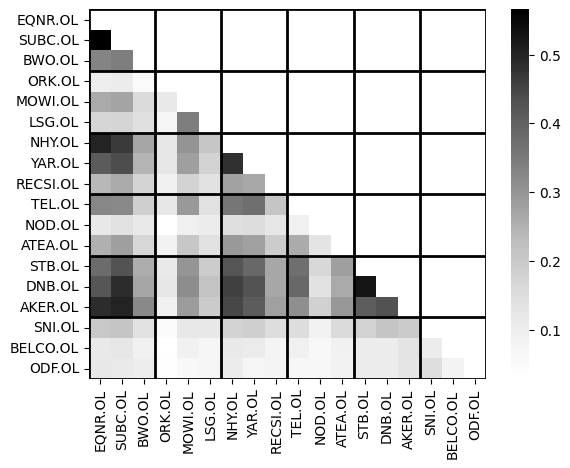

In [45]:
mask = np.triu(np.ones_like(stock_returns.corr(), dtype=bool))

sns.heatmap(stock_returns.corr(),
            mask=mask,
            # annot=True,
            cmap="Greys")

for i in range(0, 19, 3):
    plt.axhline(i, color='black', linewidth=2)  # Horizontal line
for j in range(0, 19, 3):
    plt.axvline(j, color='black', linewidth=2)  # Vertical line

plt.show()

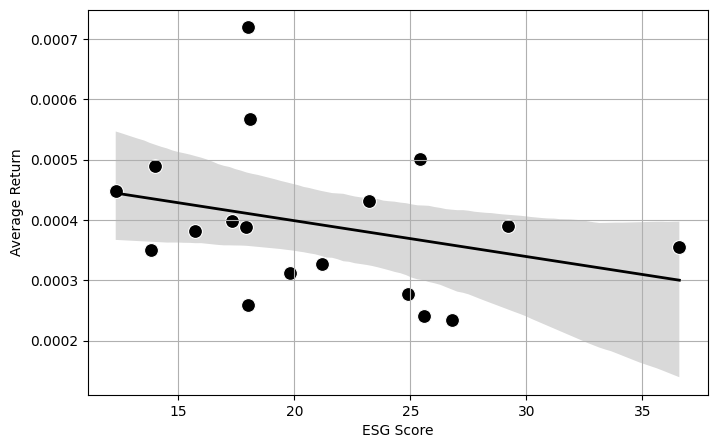

In [ ]:
# Scatter plot of ESG Score vs Average Return
plt.figure(figsize=(8, 5))
sns.regplot(x='ESG', y='Mean', data=new_dft, scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Mean', data=new_dft, s=100, color='black')

# Labels and title
plt.xlabel("ESG Score")
plt.ylabel("Average Return")
plt.grid(True)

# Show plot
plt.show()

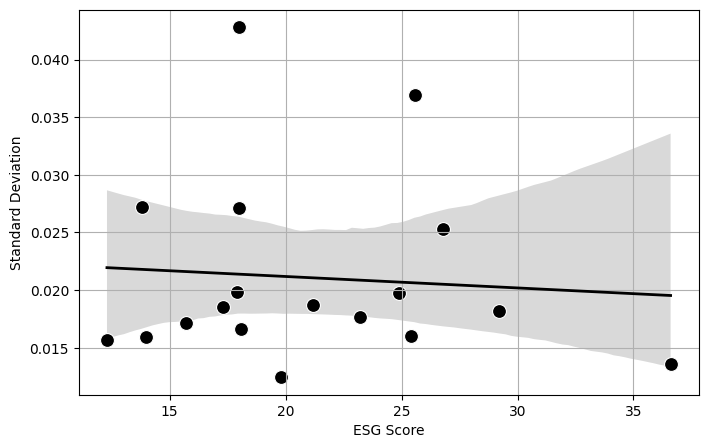

In [27]:
# Scatter plot of ESG Score vs Average Return
plt.figure(figsize=(8, 5))
sns.regplot(x='ESG', y='Std', data=new_dft, scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Std', data=new_dft, s=100, color='black')

# Labels and title
plt.xlabel("ESG Score")
plt.ylabel("Standard Deviation")
plt.grid(True)

# Show plot
plt.show()
